# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def class_conditional(x,mean,var):
    probability = (1/np.sqrt(2*np.pi*var)) * (np.exp(-0.5*((x-mean)**2/var)))
    product = np.exp(np.sum(np.log(probability),axis=1))
    return product



def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    
    X_neg = X_train[Y_train==-1]
    X_pos = X_train[Y_train==+1]
    mean = np.zeros((2,np.size(X_train,1)))
    mean[0,:] = np.mean(X_neg, axis = 0)
    mean[1,:] = np.mean(X_pos, axis = 0)
    var = 1
    
    p_y = np.zeros(2)    
    p_y[0] = ((Y_train == -1).sum())/len(Y_train)
    p_y[1] = ((Y_train == 1).sum())/len(Y_train)
    
    n = p_y[1]*(class_conditional(X_test,mean[1],var))/(p_y[1]*class_conditional(X_test,mean[1],var) + p_y[0]*class_conditional(X_test,mean[0],var))
    h = np.sign(2*n-1)
    return h
      
    
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    
    X_neg = X_train[Y_train==-1]
    X_pos = X_train[Y_train==+1]
    mean = np.zeros((2,np.size(X_train,1)))
    mean[0,:] = np.mean(X_neg, axis = 0)
    mean[1,:] = np.mean(X_pos, axis = 0)
    
    var = np.zeros((2,np.size(X_train,1)))
    var = np.var(X_train, axis = 0)
    
    p_y = np.zeros(2)
    p_y[0] = ((Y_train == -1).sum())/len(Y_train)
    p_y[1] = ((Y_train == 1).sum())/len(Y_train)
    
    n = p_y[1]*(class_conditional(X_test,mean[1],var))/(p_y[1]*class_conditional(X_test,mean[1],var) + p_y[0]*class_conditional(X_test,mean[0],var))
    h = np.sign(2*n-1)
    return h    
    
    
    

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    
    X_neg = X_train[Y_train==-1]
    X_pos = X_train[Y_train==+1]
    mean = np.zeros((2,np.size(X_train,1)))
    mean[0,:] = np.mean(X_neg, axis = 0)
    mean[1,:] = np.mean(X_pos, axis = 0)    
    
    var = np.zeros((2,np.size(X_train,1)))
    var[0,:] = np.var(X_neg, axis = 0)
    var[1,:] = np.var(X_pos, axis = 0)
    
    p_y = np.zeros(2)
    p_y[0] = ((Y_train == -1).sum())/len(Y_train)
    p_y[1] = ((Y_train == 1).sum())/len(Y_train)
    
    n = p_y[1]*(class_conditional(X_test,mean[1],var[1]))/(p_y[1]*class_conditional(X_test,mean[1],var[1]) + p_y[0]*class_conditional(X_test,mean[0],var[0]))
    h = np.sign(2*n-1)
    return h
   




In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


error rate matrix is 
 [[0.126  0.135  0.1255]
 [0.0085 0.004  0.    ]
 [0.497  0.4965 0.19  ]]


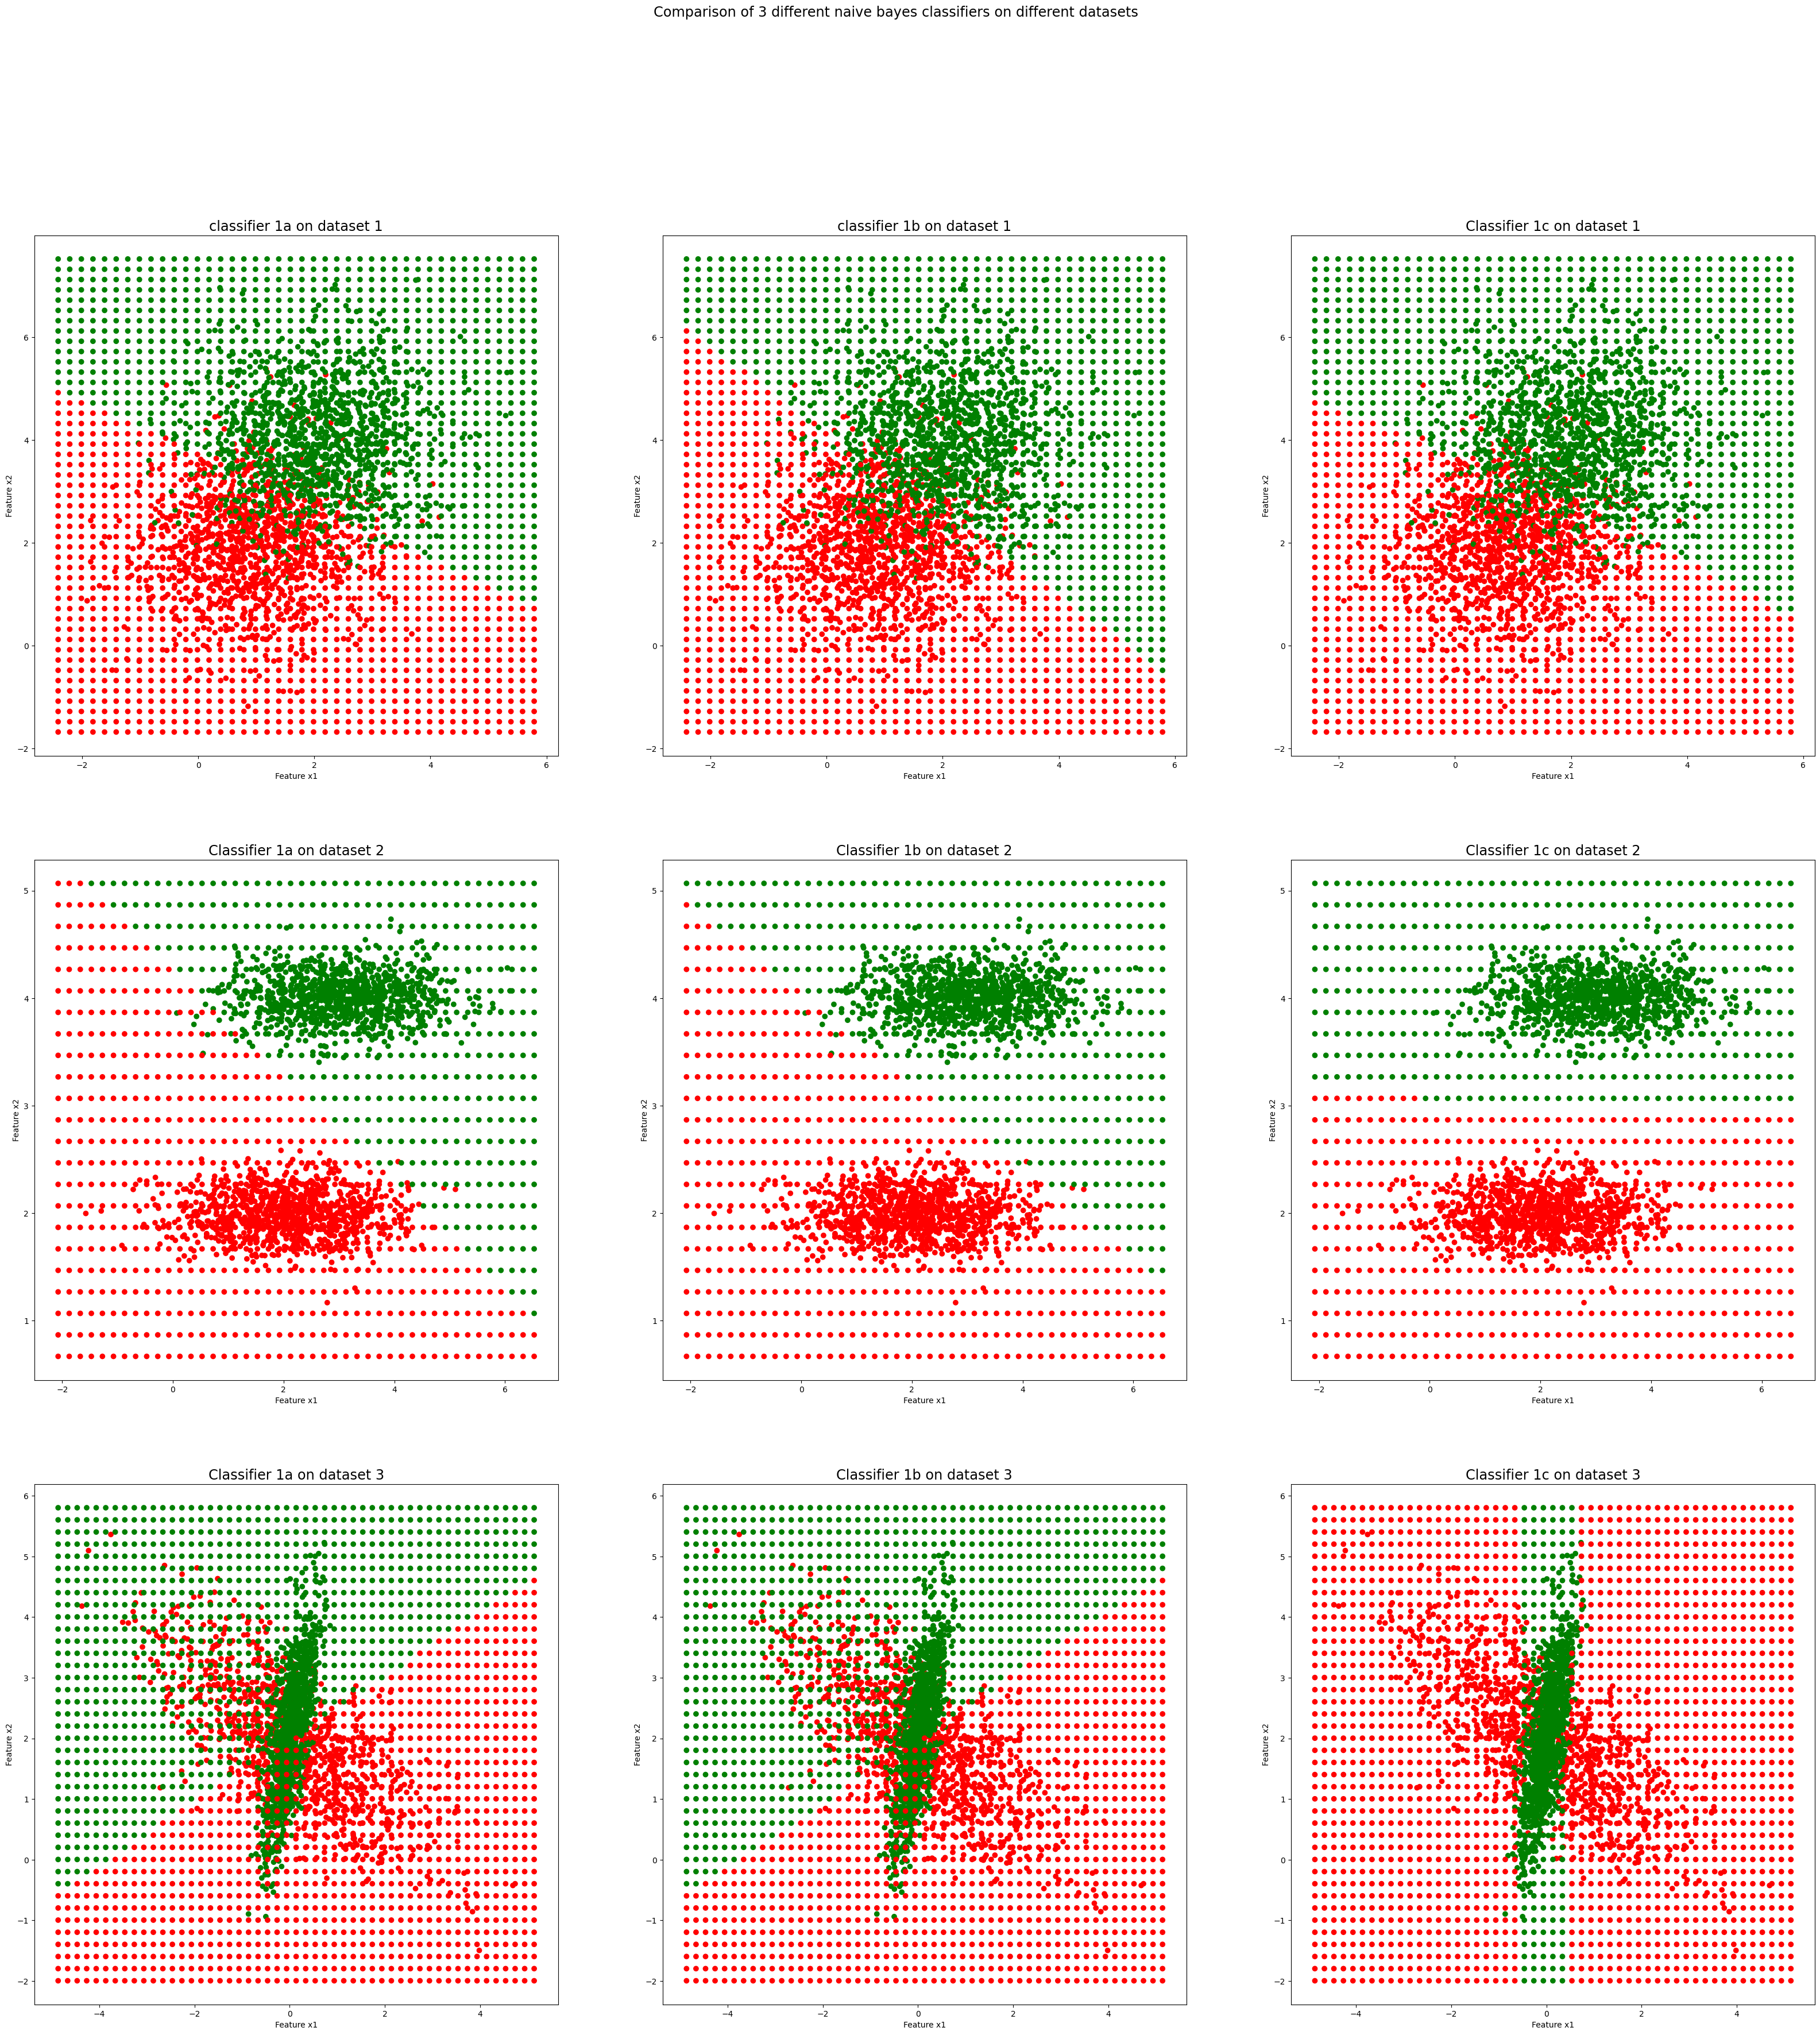

In [6]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

#colormap
color = {'green', 'red'}

fig,axs = plt.subplots(3,3,figsize = (40,40))
fig.suptitle("Comparison of 3 different naive bayes classifiers on different datasets",size = 'xx-large')
for ax in axs.flat:
    ax.set(xlabel='Feature x1', ylabel='Feature x2')
  
    
#DATASET1_1
a0_1 = dataset1_1["arr_0"]
a1_1 = dataset1_1["arr_1"]

x_min, x_max = a0_1[:, 0].min() - 0.5, a0_1[:,0].max() + 0.5
y_min, y_max = a0_1[:,1].min() - 0.5, a0_1[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

axs[0,0].scatter(a0_1[:,0], a0_1[:,1], c=a1_1, cmap = matplotlib.colors.ListedColormap(color))

axs[0,0].set_title("classifier 1a on dataset 1",size = 'xx-large')
Z = Bayes1a(a0_1, a1_1, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0,0].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[0,1].scatter(a0_1[:,0], a0_1[:,1], c=a1_1, cmap = matplotlib.colors.ListedColormap(color))

axs[0,1].set_title("classifier 1b on dataset 1",size = 'xx-large')
Z = Bayes1b(a0_1, a1_1, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0,1].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[0,2].scatter(a0_1[:,0], a0_1[:,1], c=a1_1, cmap = matplotlib.colors.ListedColormap(color))

axs[0,2].set_title("Classifier 1c on dataset 1",size = 'xx-large')
Z = Bayes1c(a0_1, a1_1, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0,2].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))




#DATASET1_2

a1_2 = dataset1_2["arr_1"]

x_min, x_max = a0_2[:, 0].min() - 0.5, a0_2[:,0].max() + 0.5
y_min, y_max = a0_2[:,1].min() - 0.5, a0_2[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

axs[1,0].scatter(a0_2[:,0],a0_2[:,1],c=a1_2,cmap = matplotlib.colors.ListedColormap(color))

axs[1,0].set_title("Classifier 1a on dataset 2",size = 'xx-large')
Z = Bayes1a(a0_2, a1_2,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1,0].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[1,1].scatter(a0_2[:,0],a0_2[:,1],c=a1_2,cmap = matplotlib.colors.ListedColormap(color))

axs[1,1].set_title("Classifier 1b on dataset 2",size = 'xx-large')
Z = Bayes1b(a0_2, a1_2,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1,1].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[1,2].scatter(a0_2[:,0],a0_2[:,1],c=a1_2,cmap = matplotlib.colors.ListedColormap(color))

axs[1,2].set_title("Classifier 1c on dataset 2",size = 'xx-large')
Z = Bayes1c(a0_2, a1_2,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1,2].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))




#DATASET1_3
a0_3 = dataset1_3["arr_0"]
a1_3 = dataset1_3["arr_1"]

x_min, x_max = a0_3[:, 0].min() - 0.5, a0_3[:,0].max() + 0.5
y_min, y_max = a0_3[:,1].min() - 0.5, a0_3[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

axs[2,0].scatter(a0_3[:,0],a0_3[:,1],c=a1_3,cmap = matplotlib.colors.ListedColormap(color))

axs[2,0].set_title("Classifier 1a on dataset 3",size = 'xx-large')
Z = Bayes1a(a0_3, a1_3,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[2,0].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[2,1].scatter(a0_3[:,0],a0_3[:,1],c=a1_3,cmap = matplotlib.colors.ListedColormap(color))

axs[2,1].set_title("Classifier 1b on dataset 3",size = 'xx-large')
Z = Bayes1b(a0_3, a1_3,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[2,1].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[2,2].scatter(a0_3[:,0],a0_3[:,1],c=a1_3,cmap = matplotlib.colors.ListedColormap(color))

axs[2,2].set_title("Classifier 1c on dataset 3",size = 'xx-large')
Z = Bayes1c(a0_3, a1_3 ,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[2,2].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))




#error matrix
err = np.zeros((3,3))
Y_pred_1_1_1a = Bayes1a(a0_1, a1_1, dataset1_1["arr_2"])
err[0,0] =  np.sum(Y_pred_1_1_1a!=dataset1_1["arr_3"])/len(dataset1_1["arr_3"])

Y_pred_1_1_1b = Bayes1b(a0_1, a1_1, dataset1_1["arr_2"])
err[0,1] =  np.sum(Y_pred_1_1_1b!=dataset1_1["arr_3"])/len(dataset1_1["arr_3"])

Y_pred_1_1_1c = Bayes1c(a0_1, a1_1, dataset1_1["arr_2"])
err[0,2] =  np.sum(Y_pred_1_1_1c!=dataset1_1["arr_3"])/len(dataset1_1["arr_3"])

Y_pred_1_2_1a = Bayes1a(a0_2, a1_2, dataset1_2["arr_2"])
err[1,0] =  np.sum(Y_pred_1_2_1a!=dataset1_2["arr_3"])/len(dataset1_2["arr_3"])

Y_pred_1_2_1b = Bayes1b(a0_2, a1_2, dataset1_2["arr_2"])
err[1,1] =  np.sum(Y_pred_1_2_1b!=dataset1_2["arr_3"])/len(dataset1_2["arr_3"])

Y_pred_1_2_1c = Bayes1c(a0_2, a1_2, dataset1_2["arr_2"])
err[1,2] =  np.sum(Y_pred_1_2_1c!=dataset1_2["arr_3"])/len(dataset1_2["arr_3"])

Y_pred_1_3_1a = Bayes1a(a0_3, a1_3, dataset1_3["arr_2"])
err[2,0] =  np.sum(Y_pred_1_3_1a!=dataset1_3["arr_3"])/len(dataset1_3["arr_3"])

Y_pred_1_3_1b = Bayes1b(a0_3, a1_3, dataset1_3["arr_2"])
err[2,1] =  np.sum(Y_pred_1_3_1b!=dataset1_3["arr_3"])/len(dataset1_3["arr_3"])

Y_pred_1_3_1c = Bayes1c(a0_3, a1_3, dataset1_3["arr_2"])
err[2,2] =  np.sum(Y_pred_1_3_1c!=dataset1_3["arr_3"])/len(dataset1_3["arr_3"])

print("error rate matrix is \n",err)


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

The third classifier performs consistently better than the other two since it's the least constrained and can find different covariances through maximum likelihood.
This is reflected in the error matrix as well, with the third column having minimum misclassification error.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [7]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
    X_1 = X_train[Y_train==1]
    X_2 = X_train[Y_train==2]
    X_3 = X_train[Y_train==3]
    X_4 = X_train[Y_train==4]

    loss_matrix = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    mean = np.zeros((4,np.size(X_train,1)))
    mean[0,:] = np.mean(X_1, axis = 0)
    mean[1,:] = np.mean(X_2, axis = 0)
    mean[2,:] = np.mean(X_3, axis = 0)
    mean[3,:] = np.mean(X_4, axis = 0)
    var = 1

    prior = np.zeros(4)  
    prior[0] = X_1.shape[0]/len(Y_train)
    prior[1] = X_2.shape[0]/len(Y_train)
    prior[2] = X_3.shape[0]/len(Y_train)
    prior[3] = X_4.shape[0]/len(Y_train)

    p_x = (prior[0]*class_conditional(X_test,mean[0],var)+prior[1]*class_conditional(X_test,mean[1],var)+prior[2]*class_conditional(X_test,mean[2],var)+prior[3]*class_conditional(X_test,mean[3],var))

    posterior = np.zeros((X_test.shape[0],4))
    posterior[:,0] = prior[0]*(class_conditional(X_test,mean[0],var))/ p_x
    posterior[:,1] = prior[1]*(class_conditional(X_test,mean[1],var))/ p_x
    posterior[:,2] = prior[2]*(class_conditional(X_test,mean[2],var))/ p_x
    posterior[:,3] = prior[3]*(class_conditional(X_test,mean[3],var))/ p_x

    h = np.argmin(np.matmul(posterior,loss_matrix),axis =1) +1

    return h
                  
    
    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_1 = X_train[Y_train==1]
    X_2 = X_train[Y_train==2]
    X_3 = X_train[Y_train==3]
    X_4 = X_train[Y_train==4]

    loss = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    mean = np.zeros((4,np.size(X_train,1)))

    mean[0,:] = np.mean( X_1, axis = 0 )
    mean[1,:] = np.mean( X_2, axis = 0 )
    mean[2,:] = np.mean( X_3, axis = 0 )
    mean[3,:] = np.mean( X_4, axis = 0 )  
    var = np.var(X_train, axis = 0 )

    prior = np.zeros(4)
    prior[0] = X_1.shape[0]/len(Y_train)
    prior[1] = X_2.shape[0]/len(Y_train)
    prior[2] = X_3.shape[0]/len(Y_train)
    prior[3] = X_4.shape[0]/len(Y_train)

    p_x = (prior[0]*class_conditional(X_test,mean[0],var)+prior[1]*class_conditional(X_test,mean[1],var)+prior[2]*class_conditional(X_test,mean[2],var)+prior[3]*class_conditional(X_test,mean[3],var))
    
    posterior = np.zeros((X_test.shape[0],4))
    posterior[:,0] = prior[0]*(class_conditional(X_test,mean[0],var))/ p_x
    posterior[:,1] = prior[1]*(class_conditional(X_test,mean[1],var))/ p_x
    posterior[:,2] = prior[2]*(class_conditional(X_test,mean[2],var))/ p_x
    posterior[:,3] = prior[3]*(class_conditional(X_test,mean[3],var))/ p_x

    h = np.argmin(np.matmul(posterior,loss),axis =1) +1
    return h
    
    
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_1 = X_train[Y_train==1]
    X_2 = X_train[Y_train==2]
    X_3 = X_train[Y_train==3]
    X_4 = X_train[Y_train==4]

    loss = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    mean = np.zeros((4,np.size(X_train,1)))
    mean[0,:] = np.mean( X_1, axis = 0 )
    mean[1,:] = np.mean( X_2, axis = 0 )
    mean[2,:] = np.mean( X_3, axis = 0 )
    mean[3,:] = np.mean( X_4, axis = 0 )

    prior = np.zeros(4)
    prior[0] = X_1.shape[0]/len(Y_train)
    prior[1] = X_2.shape[0]/len(Y_train)
    prior[2] = X_3.shape[0]/len(Y_train)
    prior[3] = X_4.shape[0]/len(Y_train)

    var = np.zeros((4,np.size(X_train,1)))
    var[0,:] = np.var(X_1, axis = 0 )
    var[1,:] = np.var(X_2, axis = 0 )
    var[2,:] = np.var(X_3, axis = 0 )
    var[3,:] = np.var(X_4, axis = 0 )

    p_x = (prior[0]*class_conditional(X_test,mean[0],var[0])+prior[1]*class_conditional(X_test,mean[1],var[1])+prior[2]*class_conditional(X_test,mean[2],var[2])+prior[3]*class_conditional(X_test,mean[3],var[3]))
    
    posterior = np.zeros((np.size(X_test,0),4))
    posterior[:,0] = prior[0]*(class_conditional(X_test,mean[0],var[0]))/ p_x
    posterior[:,1] = prior[1]*(class_conditional(X_test,mean[1],var[1]))/ p_x
    posterior[:,2] = prior[2]*(class_conditional(X_test,mean[2],var[2]))/ p_x
    posterior[:,3] = prior[3]*(class_conditional(X_test,mean[3],var[3]))/ p_x

    h = np.argmin(np.matmul(posterior,loss),axis =1) +1
    return h
    


In [8]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


Error matrix is 
 [[0.301   0.356   0.3    ]
 [0.1455  0.2395  0.10475]]

Confusion matrix for 2a classifier on dataset2_1 is 
 [[633. 219. 136.  12.]
 [ 97. 738.  62. 103.]
 [ 86.  49. 770.  95.]
 [ 15. 136. 194. 655.]]

Confusion matrix for 2b classifier on dataset2_1 is 
 [[462. 389. 145.   4.]
 [ 42. 797. 110.  51.]
 [ 39.  95. 820.  46.]
 [  4. 150. 349. 497.]]

Confusion matrix for 2c classifier on dataset2_1 is 
 [[636. 215. 137.  12.]
 [ 99. 737.  62. 102.]
 [ 86.  48. 772.  94.]
 [ 15. 136. 194. 655.]]

Confusion matrix for 2a classifier on dataset2_2 is 
 [[830. 150.  18.   2.]
 [ 93. 784.  46.  77.]
 [ 30.  61. 905.   4.]
 [  0.  23.  78. 899.]]

Confusion matrix for 2b classifier on dataset2_2 is 
 [[706. 287.   6.   1.]
 [ 33. 737. 223.   7.]
 [  8. 137. 855.   0.]
 [  0.   1. 255. 744.]]

Confusion matrix for 2c classifier on dataset2_2 is 
 [[903.  78.  19.   0.]
 [ 65. 819.  41.  75.]
 [ 19.  30. 941.  10.]
 [  0.  33.  49. 918.]]


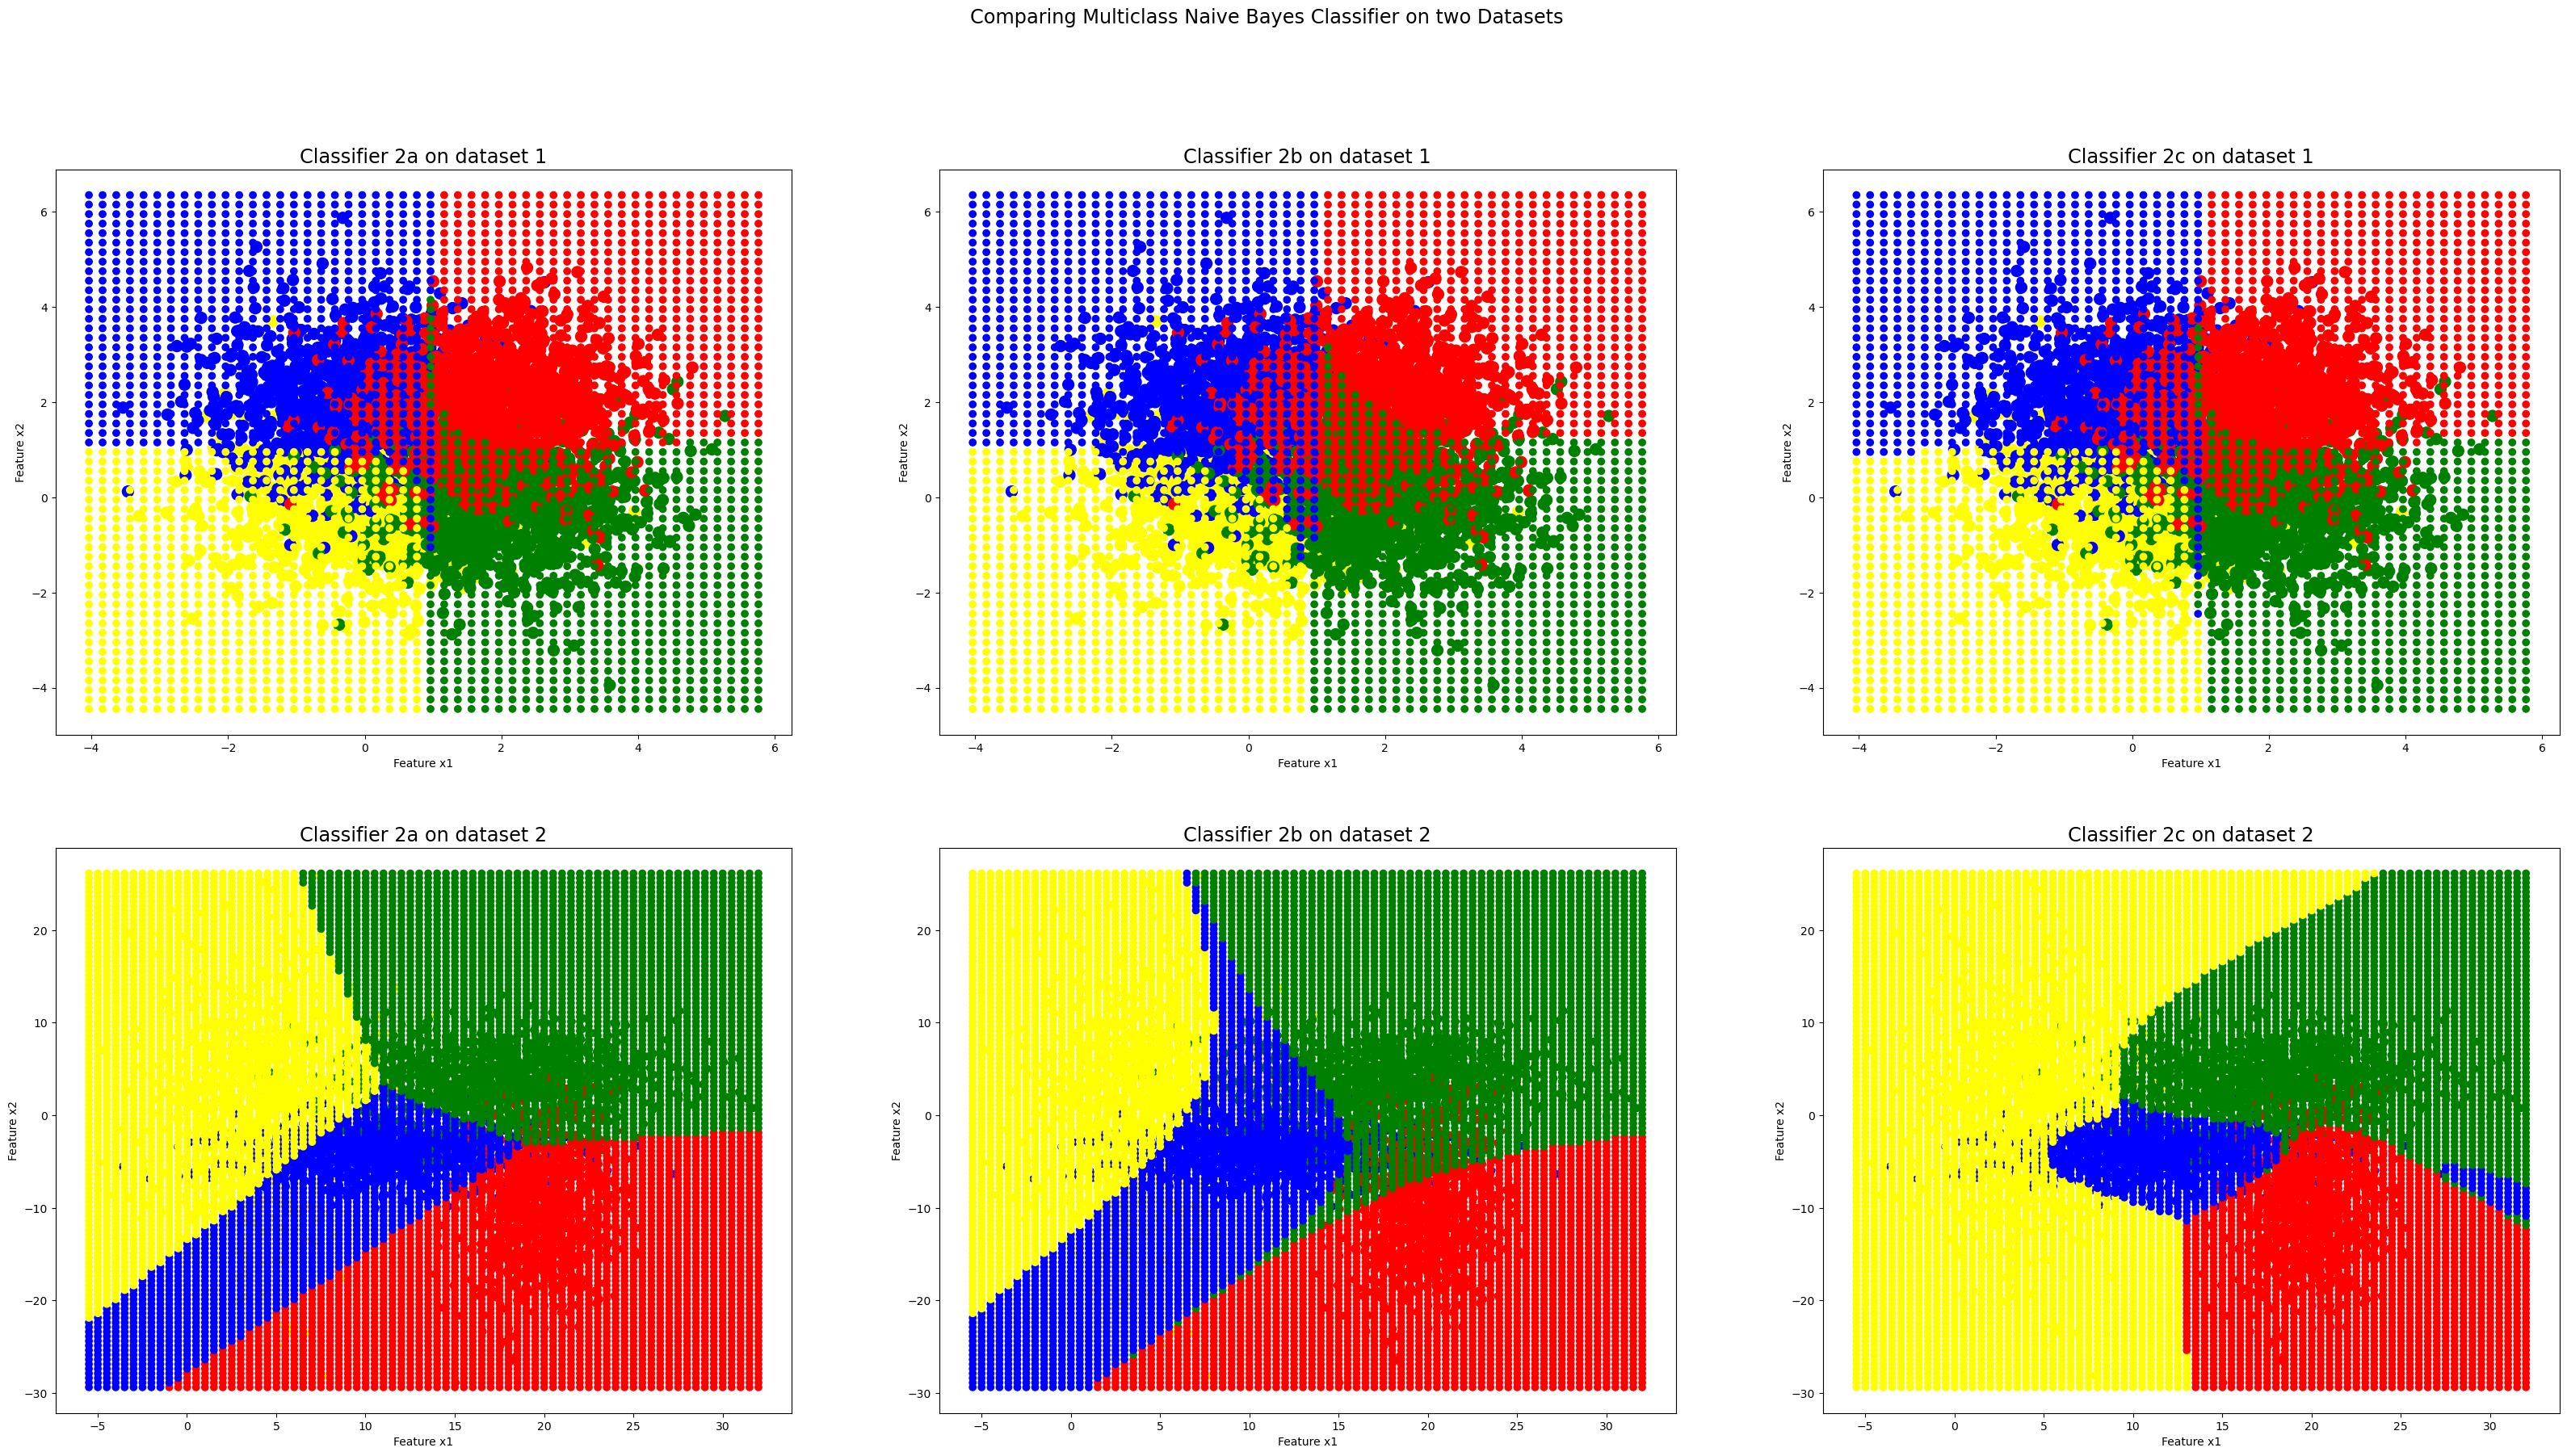

In [9]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

color = {'red','blue','green','yellow'}

fig,axs = plt.subplots(2,3,figsize = (40,20))
fig.suptitle("Comparing Multiclass Naive Bayes Classifier on two Datasets", size = 'xx-large')
for ax in axs.flat:
    ax.set(xlabel='Feature x1', ylabel='Feature x2')
    

#dataset1_1

a0_1 = dataset2_1["arr_0"]
a1_1 = dataset2_1["arr_1"]

x_min, x_max = a0_1[:, 0].min() - .5, a0_1[:,0].max() + .5
y_min, y_max = a0_1[:,1].min() - .5, a0_1[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

axs[0,0].scatter(a0_1[:,0],a0_1[:,1],c=a1_1,cmap = matplotlib.colors.ListedColormap(color),s = 100)

axs[0,0].set_title("Classifier 2a on dataset 1",size = 'xx-large')
Z = Bayes2a(a0_1, a1_1,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0,0].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[0,1].scatter(a0_1[:,0],a0_1[:,1],c=a1_1,cmap = matplotlib.colors.ListedColormap(color),s = 100)

axs[0,1].set_title("Classifier 2b on dataset 1",size = 'xx-large')
Z = Bayes2b(a0_1, a1_1,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0,1].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[0,2].scatter(a0_1[:,0],a0_1[:,1],c=a1_1,cmap = matplotlib.colors.ListedColormap(color),s = 100)

axs[0,2].set_title("Classifier 2c on dataset 1",size = 'xx-large')
Z = Bayes2c(a0_1, a1_1,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0,2].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))





a0_2 = dataset2_2["arr_0"]
a1_2 = dataset2_2["arr_1"]

x_min, x_max = a0_2[:, 0].min() - .5, a0_2[:,0].max() + .5
y_min, y_max = a0_2[:,1].min() - .5, a0_2[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

axs[1,0].scatter(a0_2[:,0],a0_2[:,1],c=a1_2,cmap = matplotlib.colors.ListedColormap(color))

axs[1,0].set_title("Classifier 2a on dataset 2",size = 'xx-large')
Z = Bayes2a(a0_2, a1_2,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1,0].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[1,1].scatter(a0_2[:,0],a0_2[:,1],c=a1_2,cmap = matplotlib.colors.ListedColormap(color))

axs[1,1].set_title("Classifier 2b on dataset 2",size = 'xx-large')
Z = Bayes2b(a0_2, a1_2,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1,1].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))

axs[1,2].scatter(a0_2[:,0],a0_2[:,1],c=a1_2,cmap = matplotlib.colors.ListedColormap(color))

axs[1,2].set_title("Classifier 2c on dataset 2",size = 'xx-large')
Z = Bayes2c(a0_2, a1_2,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1,2].scatter(xx, yy, c=Z, cmap=matplotlib.colors.ListedColormap(color))





#error anlysis
err = np.zeros((2,3))
conf = np.zeros((4,4))
loss = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

Y_pred_2_1_2a = Bayes2a(a0_1, a1_1, dataset2_1["arr_2"])
Y_pred_2_1_2b = Bayes2b(a0_1, a1_1, dataset2_1["arr_2"])
Y_pred_2_1_2c = Bayes2c(a0_1, a1_1, dataset2_1["arr_2"])
Y_pred_2_2_2a = Bayes2a(a0_2, a1_2, dataset2_2["arr_2"])
Y_pred_2_2_2b = Bayes2b(a0_2, a1_2, dataset2_2["arr_2"])
Y_pred_2_2_2c = Bayes2c(a0_2, a1_2, dataset2_2["arr_2"])

err[0,0] =  np.sum(Y_pred_2_1_2a!=dataset2_1["arr_3"])/len(dataset2_1["arr_3"])
err[0,1] =  np.sum(Y_pred_2_1_2b!=dataset2_1["arr_3"])/len(dataset2_1["arr_3"])
err[0,2] =  np.sum(Y_pred_2_1_2c!=dataset2_1["arr_3"])/len(dataset2_1["arr_3"])
err[1,0] =  np.sum(Y_pred_2_2_2a!=dataset2_2["arr_3"])/len(dataset2_2["arr_3"])
err[1,1] =  np.sum(Y_pred_2_2_2b!=dataset2_2["arr_3"])/len(dataset2_2["arr_3"])
err[1,2] =  np.sum(Y_pred_2_2_2c!=dataset2_2["arr_3"])/len(dataset2_2["arr_3"])

print("Error matrix is \n",err )

for i in range(4):
    for j in range(4):        
        conf[i,j] = np.sum(np.logical_and(Y_pred_2_1_2a==(j+1),dataset2_1["arr_3"]==(i+1)))        
print("\nConfusion matrix for 2a classifier on dataset2_1 is \n", conf)       

for i in range(4):
    for j in range(4):        
        conf[i,j] = np.sum(np.logical_and(Y_pred_2_1_2b==(j+1),dataset2_1["arr_3"]==(i+1)))        
print("\nConfusion matrix for 2b classifier on dataset2_1 is \n", conf)   

for i in range(4):
    for j in range(4):        
        conf[i,j] = np.sum(np.logical_and(Y_pred_2_1_2c==(j+1),dataset2_1["arr_3"]==(i+1)))        
print("\nConfusion matrix for 2c classifier on dataset2_1 is \n", conf)

for i in range(4):
    for j in range(4):        
        conf[i,j] = np.sum(np.logical_and(Y_pred_2_2_2a==(j+1),dataset2_2["arr_3"]==(i+1)))        
print("\nConfusion matrix for 2a classifier on dataset2_2 is \n", conf)

for i in range(4):
    for j in range(4):        
        conf[i,j] = np.sum(np.logical_and(Y_pred_2_2_2b==(j+1),dataset2_2["arr_3"]==(i+1)))        
print("\nConfusion matrix for 2b classifier on dataset2_2 is \n", conf) 

for i in range(4):
    for j in range(4):        
        conf[i,j] = np.sum(np.logical_and(Y_pred_2_2_2c==(j+1),dataset2_2["arr_3"]==(i+1)))        
print("\nConfusion matrix for 2c classifier on dataset2_2 is \n", conf) 



** Cell type : TextWrite ** 
(Write your observations and table of errors here)

A similar trend to the previous question is found here. Classifier with different covariances of it's features performs best.
Third column of error matrix is the minimum valued column.
Error matrix is 
 [[0.301   0.356   0.3    ]
 [0.1455  0.2395  0.10475]]


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




In [10]:
def truef(X_val):
    """
    This functions computes true y values for input X values
    """
    a = np.array([0.5, 0.5])
    b = np.array([-0.5, -0.5])
    c = np.array([0.5, -0.5])      
                
    y = np.exp(-4*np.sum(np.power((X_val - a),2), axis=1)) + np.exp(-4*np.sum(np.power((X_val - b),2), axis=1)) + np.exp(-4*np.sum(np.power((X_val - c),2), axis=1))
        
    return y.reshape(-1,1)

def gen_phi(X, degree):
    """
    Generates basis functions and combines them to form phi matrix with 'dp' columns
    """
    
    X1 = X[:,0].reshape(-1,1)
    X2 = X[:,1].reshape(-1,1)
    
    d = 2
    k = degree
    
    dp = np.math.factorial(d+k)/(np.math.factorial(d)*np.math.factorial(k))
    phi = np.ones((X.shape[0],1))
        
    for i in list(range(k+1))[1:]:
        
        ca = i
        cb = 0
        
        while ca>=0 and cb<=i:
            phi = np.concatenate((phi,(np.multiply(np.power(X1,ca), np.power(X2,cb)))), axis=1)
            ca = ca - 1
            cb = cb + 1
                                  
    return phi   

In [11]:
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,1)

    Returns:
    w : numpy array of shape (d',1) with appropriate d'    
    """
    
    phi_x = gen_phi(X_train, degree)
    
    # Closed form solution for W from X,Y:
    inv = la.inv(np.matmul(phi_x.T,phi_x) + reg_param*np.eye(phi_x.shape[1]))     
    w = np.matmul(np.matmul(inv,phi_x.T),Y_train)
    
    return w  
 

In [12]:
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',1)

    Returns:
    Y_test_pred : numpy array of shape (n,1)    
    """
        
    
    phi_test = gen_phi(X_test, degree)
    y_test = np.matmul(phi_test, wt_vector)
    
    return y_test
    

In [13]:
def visualise_polynomial_2d(wt_vector, degree, reg_param):
    """  
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt
    
    I modifed the input to this cell to take in 4 weight vectors at once and plot them in neat subplots of (1,4)    
    """
    
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    def get_z(wt, degree):                                
        """
        This function calculates Z mapping over X,Y - sorta like fs
        
        Arguments - wt, degree
        Return - Z
        """
        
        Z = np.zeros((100,100))    

        for i in range(100):
            X_col = X[:,i].reshape(-1,1)
            Y_col = Y[:,i].reshape(-1,1)
        
            XY = np.concatenate((X_col,Y_col), axis=1)
            Z[:,i] = polynomial_regression_ridge_pred(XY, wt, degree).reshape(-1,)
            
        return Z

    w1 = wt_vector[:,0].reshape(-1,1)                # Extracting all four weights from wt_vector
    w2 = wt_vector[:,1].reshape(-1,1)
    w3 = wt_vector[:,2].reshape(-1,1)
    w4 = wt_vector[:,3].reshape(-1,1)
    
    plt.figure(figsize=(25,4))
    plt.title("For a given degree " + str(degree) + " and reg param " + str(reg_param))
    
    plt.subplot(1,4,1)
    plt.contourf(X,Y,get_z(w1,degree),levels=np.linspace(0.,1.2 , 20))
    plt.title("Dataset 30 weights")
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.colorbar(label="Y_pred")
    
    plt.subplot(1,4,2)
    plt.contourf(X,Y,get_z(w2,degree),levels=np.linspace(0.,1.2 , 20))
    plt.title("Dataset 60 weights")
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.colorbar(label="Y_pred")
    
    plt.subplot(1,4,3)
    plt.contourf(X,Y,get_z(w3,degree),levels=np.linspace(0.,1.2 , 20))
    plt.title("Dataset 90 weights")
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.colorbar(label="Y_pred")
    
    plt.subplot(1,4,4)
    plt.contourf(X,Y,get_z(w4,degree),levels=np.linspace(0.,1.2 , 20))
    plt.title("gx - Mean of fs")
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.colorbar(label="Y_pred") 
    

In [14]:
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    """
    Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. 
    """

       
    D = np.random.uniform(-1,1,(num_training_samples,2))                        # 100 dataset runs to extract bias, variance
    fa = truef(D).reshape(-1,1)
    bigfa = fa
    
    wt = polynomial_regression_ridge_train(D, fa, degree, reg_param)
    bigw = wt
    
    fs = polynomial_regression_ridge_pred(D, wt, degree)
    bigfs = fs
       
    for i in range(99):
        
        D = np.random.uniform(-1,1,(num_training_samples,2))
        fa = truef(D).reshape(-1,1)
        bigfa = np.concatenate((bigfa,fa), axis=1)
    
        wt = polynomial_regression_ridge_train(D, fa, degree, reg_param)
        bigw = np.concatenate((bigw,wt), axis=1)
    
        fs = polynomial_regression_ridge_pred(D, wt, degree)
        bigfs = np.concatenate((bigfs,fs), axis=1)      
    
    gx = np.mean(bigfs, axis=1).reshape(-1,1)
        
    bias_sq = np.mean(np.power((bigfa - gx),2))
    variance = np.mean(np.power((bigfs-gx),2))
    av_mse = np.mean(np.power((bigfs - bigfa),2))
   
    wt_vec = np.concatenate((bigw[:,30].reshape(-1,1), bigw[:,60].reshape(-1,1), bigw[:,90].reshape(-1,1), np.mean(bigw, axis=1).reshape(-1,1)), axis=1)
    visualise_polynomial_2d(wt_vec, degree, reg_param)
    
    return bias_sq, variance, av_mse
    

In [ ]:
# Cell type : CodeWrite

bias_matrix = np.zeros((5,6))
variance_matrix = np.zeros((5,6))
mse_matrix = np.zeros((5,6))

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        i = int(np.log2(degree))
        j = int(0.5*(np.log10(reg_param) + 7))
        bias_matrix[i,j] = b
        variance_matrix[i,j] = v
        mse_matrix[i,j] = e        
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))        


In [16]:
# Cell type: convenience


** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

1)Severe regularization leads to weight decay to zero. This is seen in the contour plots where it's mostly purple for high reg_param values (zero fs value)

2)As reg_param increases, bias increases as the learned function becomes simpler (increased weight penalty) - high bias low variance 

3)When reg_param is low, variance is high and it decreases as lambda increases

4)Higher order polynomials have higher variance and lower bias

5)The true function y has an exponential form, hence higher order polynomials (degree=8 or 16) appriximate it better, leading to low mean squared error.


In [17]:
print("Bias matrix \n", bias_matrix)
print("\n Variance matrix \n", variance_matrix)

Bias matrix 
 [[0.0872251  0.08754348 0.085922   0.08689352 0.09187049 0.31358754]
 [0.08629926 0.0861308  0.08312451 0.08344707 0.09231932 0.30185156]
 [0.08563558 0.08619909 0.08560768 0.08584263 0.09392411 0.30968439]
 [0.08651377 0.08391605 0.0851918  0.08744206 0.09053643 0.30575686]
 [0.08557878 0.08700194 0.08619978 0.08601248 0.0929318  0.30365465]]

 Variance matrix 
 [[3.60602335e-02 3.66291454e-02 3.49795847e-02 3.57902257e-02
  1.35108047e-02 1.76553066e-05]
 [5.66973775e-02 5.70734573e-02 5.39183183e-02 5.20301301e-02
  1.54197471e-02 2.67057713e-05]
 [8.22090775e-02 8.26548053e-02 8.14146714e-02 6.84174688e-02
  1.88718905e-02 5.06401476e-05]
 [8.65118093e-02 8.38436022e-02 8.37926017e-02 7.41125065e-02
  1.75962762e-02 8.96633460e-05]
 [8.55779511e-02 8.69626096e-02 8.51274991e-02 7.33630712e-02
  1.98486521e-02 1.20911495e-04]]


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




In [18]:
# Cell type : CodeWrite 
 
set_size_vec = [50,100,200,1000]
degree_list = [1,2,4,8,16]
reg_param_list = [1e-9,1e-7, 1e-5, 1e-3, 1e-1, 1e1]

a0 = b['arr_0']
a1 = b['arr_1'].reshape(-1,1)
a2 = b['arr_2']
a3 = b['arr_3'].reshape(-1,1)

def poly_regression():
    
    X_test = a2
    Y_test = a3
        
    train_error = np.zeros((5,6,4))
    test_error = np.zeros((5,6,4))

    for k in range(4):
        
        set_size = set_size_vec[k]
        X_tr = a0[0:set_size,:].reshape(-1,2)
        Y_tr = a1[0:set_size,:].reshape(-1,1)
        
        for i in range(5):
            degree = degree_list[i]
            
            for j in range(6):
                reg_param = reg_param_list[j]
                
                w = polynomial_regression_ridge_train(X_tr, Y_tr, degree = degree, reg_param = reg_param)   
                
                Y_tr_pred = polynomial_regression_ridge_pred(X_tr, w, degree)
                Y_test_pred = polynomial_regression_ridge_pred(X_test, w, degree)
                
                train_error[i,j,k] = np.mean(np.power((Y_tr_pred - Y_tr),2))
                test_error[i,j,k] = np.mean(np.power((Y_test_pred - Y_test),2))
                          
    return train_error, test_error
    

Best degree is 16
Best reg_param is 1e-09
Best set_size is 1000


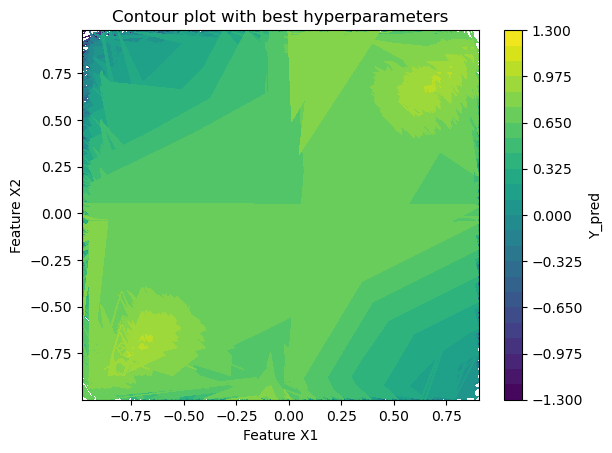

In [19]:
t, s = poly_regression()
minim = np.where(s == np.amin(s))
(i,j,k) = minim
i = int(i)
j = int(j)
k = int(k)

best_degree = degree_list[i]
best_reg_param = reg_param_list[j]
best_set_size = set_size_vec[k]

def best_visual(degree, reg_param, set_size):
    
    X_tr = a0[0:set_size,:].reshape(-1,2)
    Y_tr = a1[0:set_size,:].reshape(-1,1)
    
    X_test = a2
    Y_test = a3
    
    wt = polynomial_regression_ridge_train(X_tr, Y_tr, degree = degree, reg_param = reg_param) 
    
    X,Y = np.meshgrid(X_test[0:100,0].reshape(-1,1), X_test[0:100,1].reshape(-1,1))   
    Z = np.zeros((100,100))    

    for i in range(100):
        X_col = X[:,i].reshape(-1,1)
        Y_col = Y[:,i].reshape(-1,1)
        
        XY = np.concatenate((X_col,Y_col), axis=1)
        Z[:,i] = polynomial_regression_ridge_pred(XY, wt, degree).reshape(-1,)
        
    plt.contourf(X,Y,Z,levels=np.linspace(-1.3, 1.3, 25))
    plt.title("Contour plot with best hyperparameters")
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.colorbar(label="Y_pred")        

best_visual(best_degree, best_reg_param, best_set_size)

print("Best degree is " + str(best_degree))
print("Best reg_param is " + str(best_reg_param))
print("Best set_size is " + str(best_set_size))

In [20]:
for k in range(4):
    print("\n Dataset size " + str(set_size_vec[k]))
    print("\n Train error matrix \n", t[:,:,k])
    print("\n Test error matrix \n", s[:,:,k])


 Dataset size 50

 Train error matrix 
 [[2.50383124e-01 2.50383124e-01 2.50383124e-01 2.50383124e-01
  2.50384416e-01 2.55897830e-01]
 [1.34111598e-01 1.34111598e-01 1.34111598e-01 1.34111609e-01
  1.34213059e-01 1.97482699e-01]
 [1.02018315e-01 1.02018315e-01 1.02018315e-01 1.02019456e-01
  1.04106649e-01 1.80637925e-01]
 [1.32732739e-04 1.99157118e-04 1.07657812e-02 4.17213446e-02
  8.19909925e-02 1.63199702e-01]
 [1.95658184e-08 9.36700108e-06 1.31769315e-03 3.11130925e-02
  7.00207055e-02 1.50012860e-01]]

 Test error matrix 
 [[3.01266818e-01 3.01266817e-01 3.01266774e-01 3.01262496e-01
  3.00838224e-01 2.78350694e-01]
 [1.57899989e-01 1.57899987e-01 1.57899852e-01 1.57886318e-01
  1.56735259e-01 2.08223641e-01]
 [1.57333966e-01 1.57333956e-01 1.57332950e-01 1.57242781e-01
  1.61826388e-01 1.96568595e-01]
 [2.37690057e+02 1.72501862e+02 1.85942539e+01 9.90250753e-01
  1.65155762e-01 1.93918588e-01]
 [2.50522569e+02 2.32024834e+02 6.66976844e+01 2.33730833e+00
  2.03961457e-01 1.

** Cell type : TextWrite **

1) Overfitting decreases as the dataset size increases, since it becomes more difficult to learn the noise in a large dataset

2) Regularization param lambda also controls fitting, with high lambda values leading to zero weights and underfitting, whereas minimum lambda values lead to slight overfitting with min weight penalty



** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










In [21]:
# Cell type : CodeWrite 

X_in = np.array([[1, 2], [2, 2.1], [0.6, 1.5], [1.1, 0.9]]).reshape(4,2)
Y_in = np.array([5.1, 6.1, 4.2, 2.9]).reshape(-1,1)

def normal_dist(mean, cov, vec):
    """
    Returns the value of normal dist with mean=mean, covariance=cov and input vec
    """
    
    return np.exp(-0.5*np.matmul((vec-mean), np.matmul(cov, (vec-mean).T)))

def posterior_analysis(u_prior, tau_sq, sig_sq, X, Y):
    
    taus = tau_sq*np.eye(np.size(u_prior))
    
    # sn and mn are calculated with bishop equations 3.50 and 3.51
    sn = la.inv(la.inv(taus) + (np.matmul(X.T, X)/sig_sq))       
    mn = np.matmul(sn, ((np.matmul(X.T, Y)/sig_sq) + (np.matmul(la.inv(taus), u_prior.reshape(2,1)))))
    
    w1,w2 = np.meshgrid(np.linspace(-10,10,200), np.linspace(-10,10,200))
    
    w_prior = np.zeros((200,200))
    w_posterior = np.zeros((200,200))             

    for i in range(200):
        for j in range(200):
                    
            w3 = np.array([w1[i,j], w2[i,j]]).reshape(1,2)
            w_prior[i,j] = normal_dist(mean = u_prior, cov = taus, vec = w3)
            w_posterior[i,j] = normal_dist(mean = mn.reshape(1,2), cov = sn, vec = w3)
       
    plt.figure(figsize=(13,4))
    plt.suptitle("Contour plots for u_prior - " + str(u_prior.reshape(2,)) + ", tau_sq -  " + str(tau_sq) + ", sig_sq - " + str(sig_sq))
    
    plt.subplot(1,2,1)
    plt.contourf(w1, w2, w_prior ,levels=6)
    plt.title("w_prior")
    plt.xlabel("Feature w1")
    plt.ylabel("Feature w2")
    plt.colorbar(label="wp")  
                  
    plt.subplot(1,2,2)
    plt.contourf(w1, w2, w_posterior ,levels=6)
    plt.title("w_posterior")
    plt.xlabel("Feature w1")
    plt.ylabel("Feature w2")
    plt.colorbar(label="wpost") 

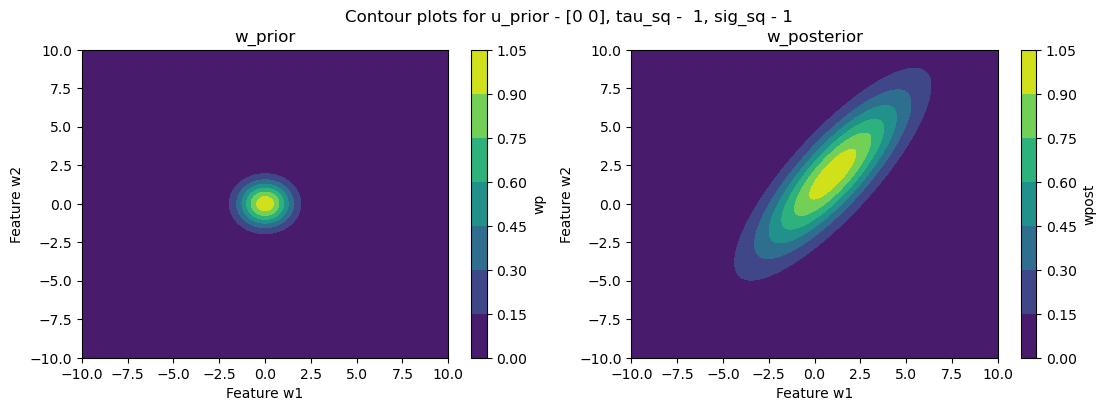

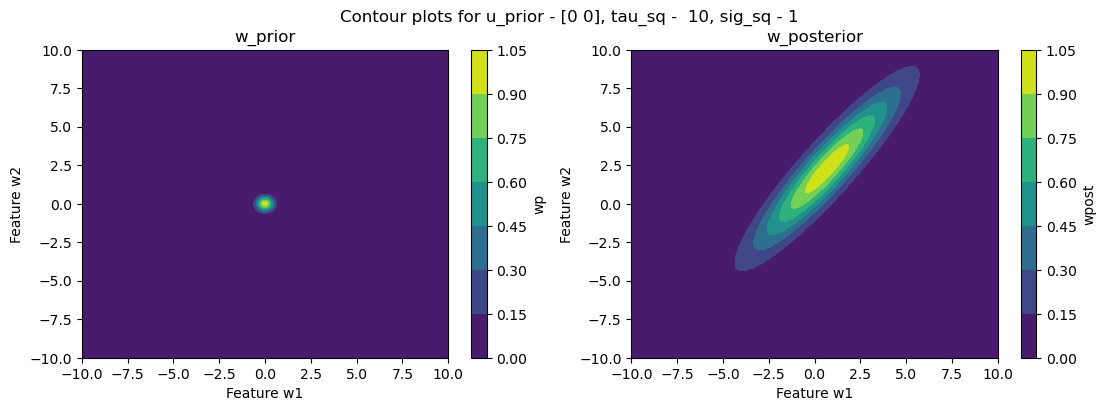

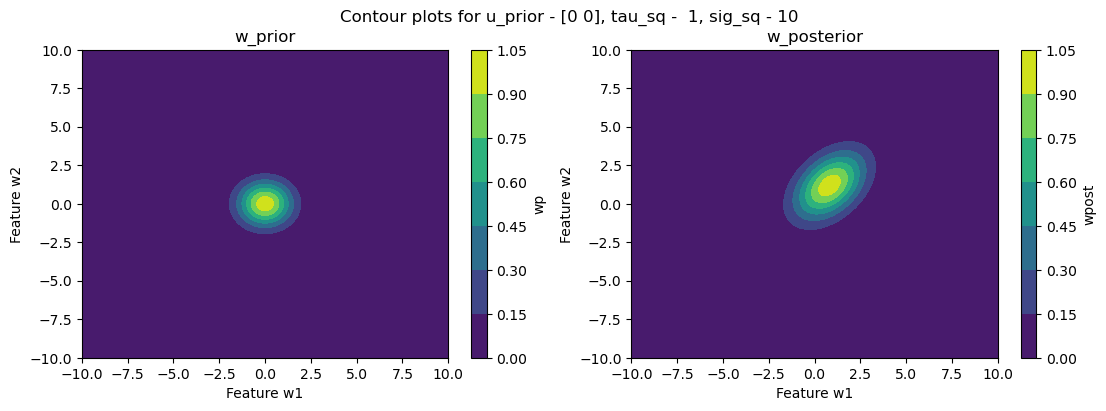

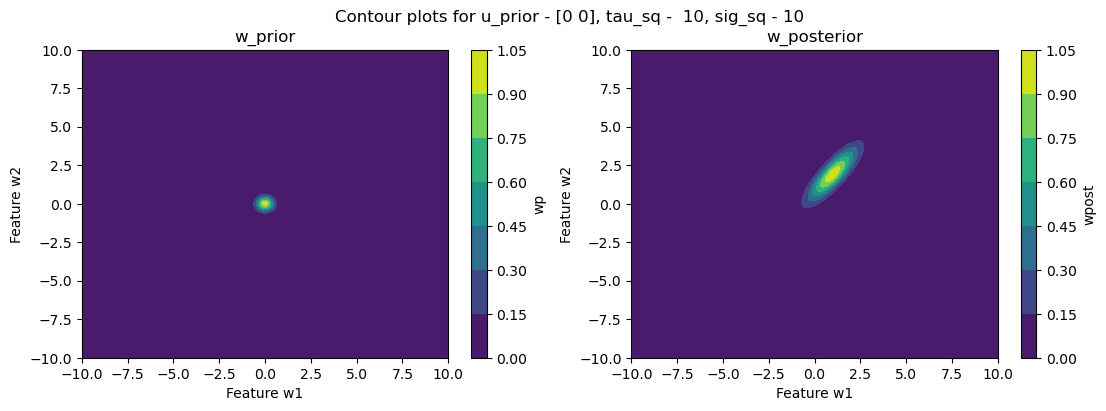

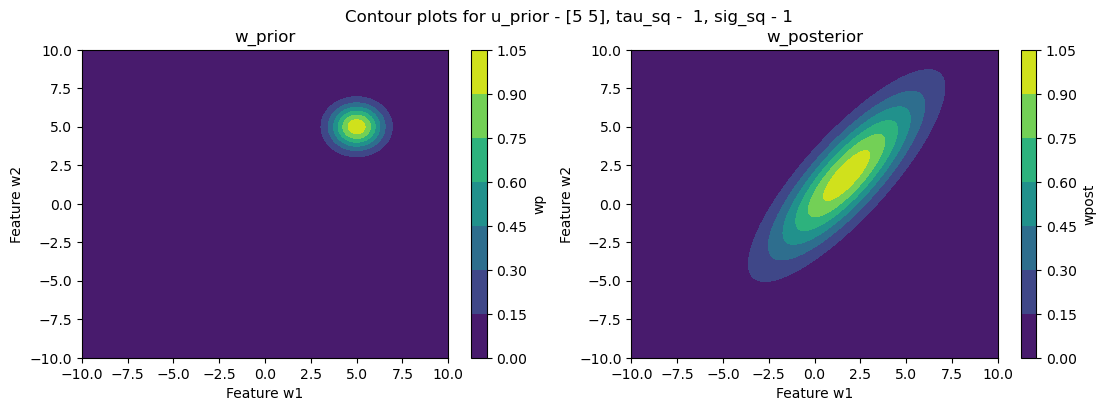

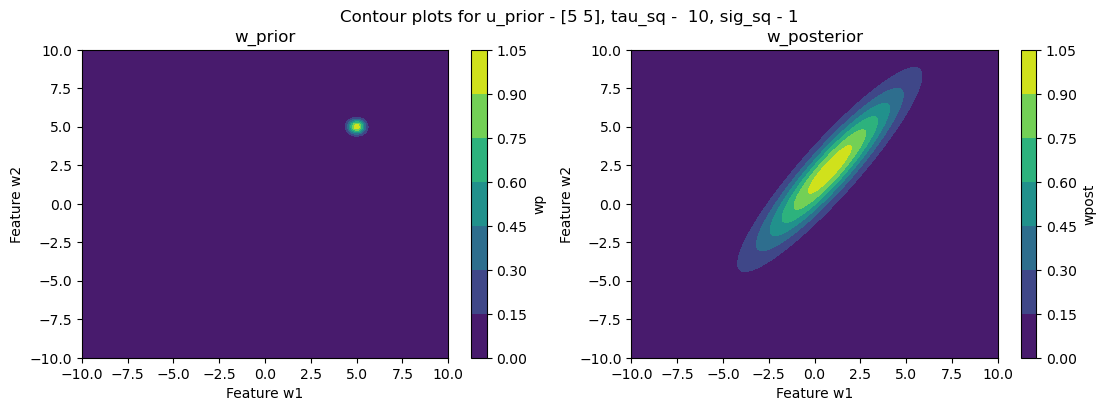

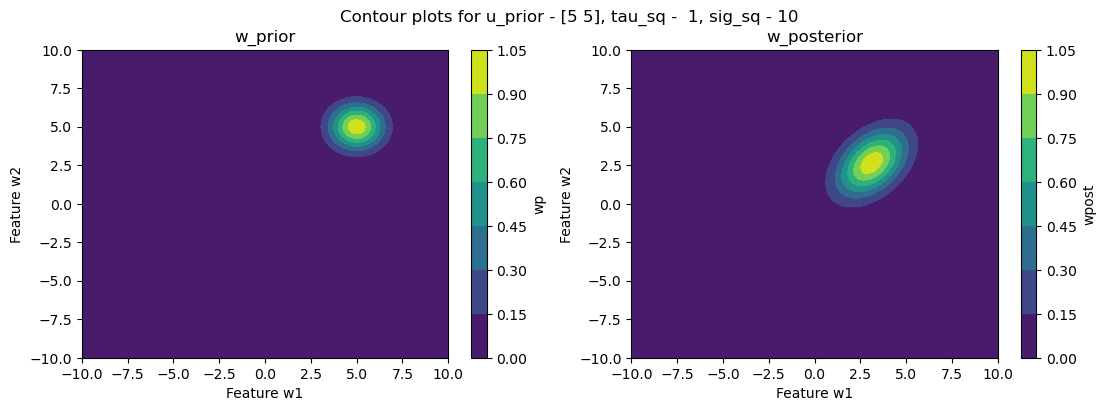

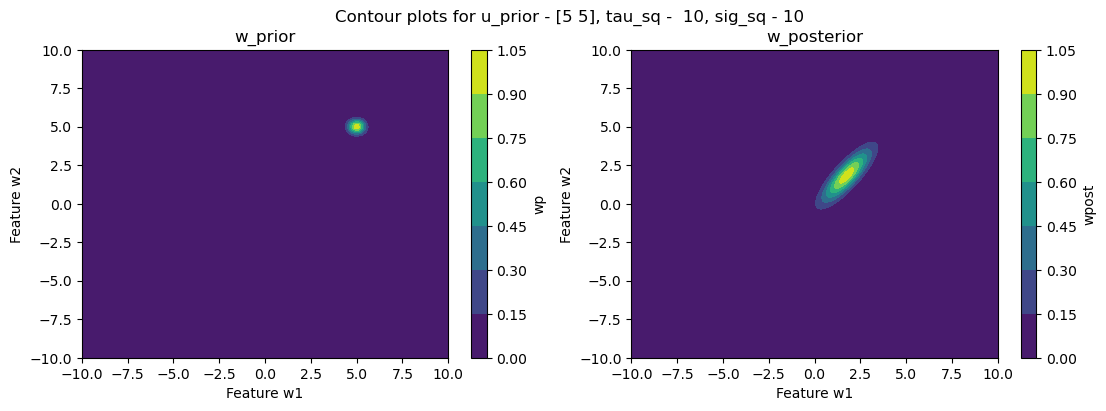

In [22]:
u_range = np.array([[0,0], [0,0], [0,0], [0,0], [5,5], [5,5], [5,5], [5,5]]).reshape(8,2)
tau_range = np.array([1, 10, 1, 10, 1, 10, 1, 10])
sig_range = np.array([1, 1, 10, 10, 1, 1, 10, 10])

for i in range(8):
    
    u_pr = u_range[i, :].reshape(1,2)
    tau = tau_range[i]
    sig = sig_range[i]
    
    posterior_analysis(u_pr,tau_sq=tau, sig_sq=sig, X=X_in, Y=Y_in)

 The following contourplots are for the enhanced dataset 


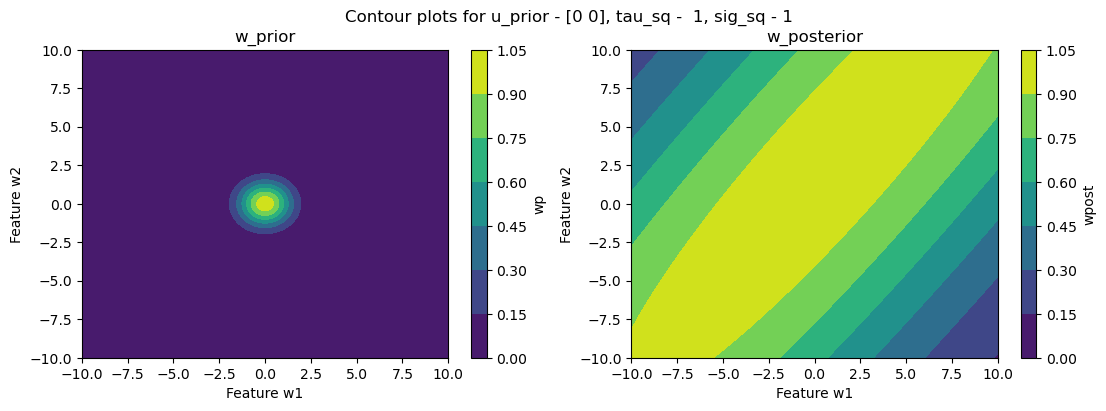

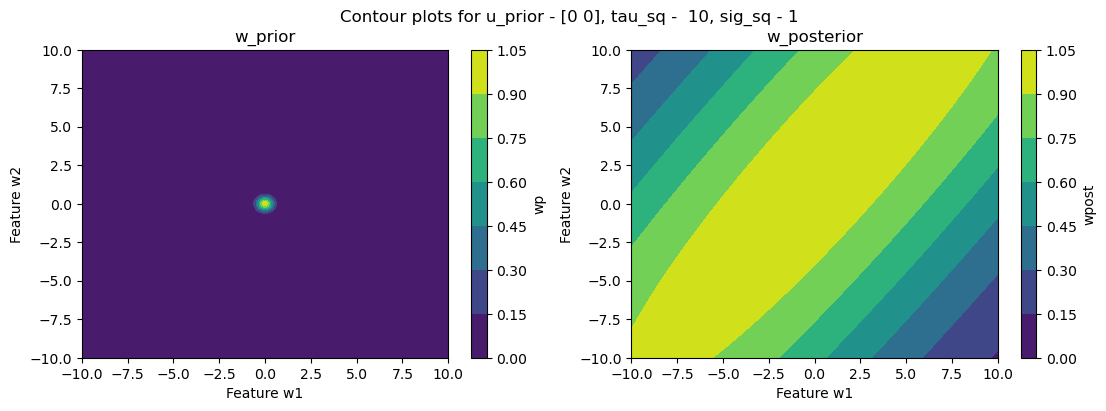

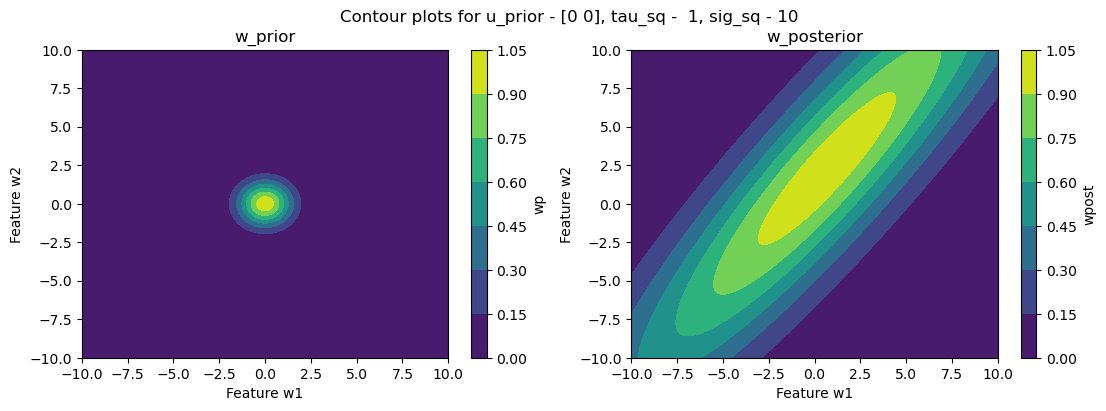

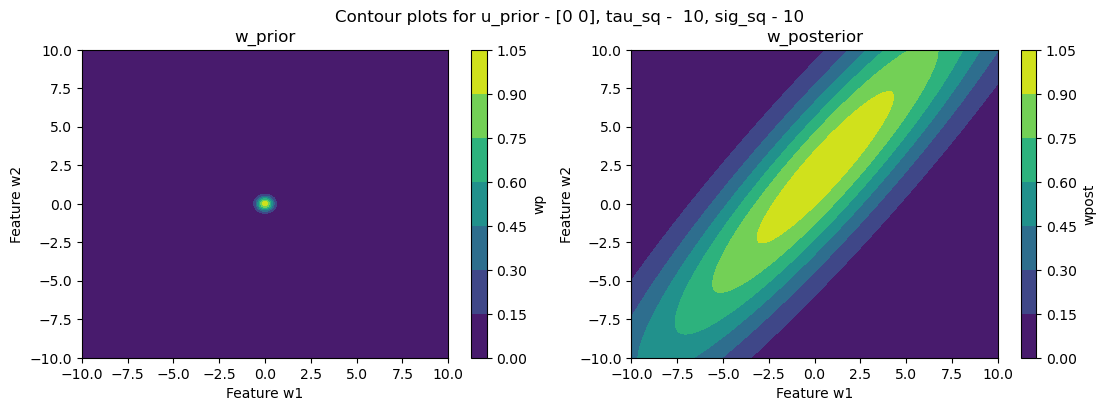

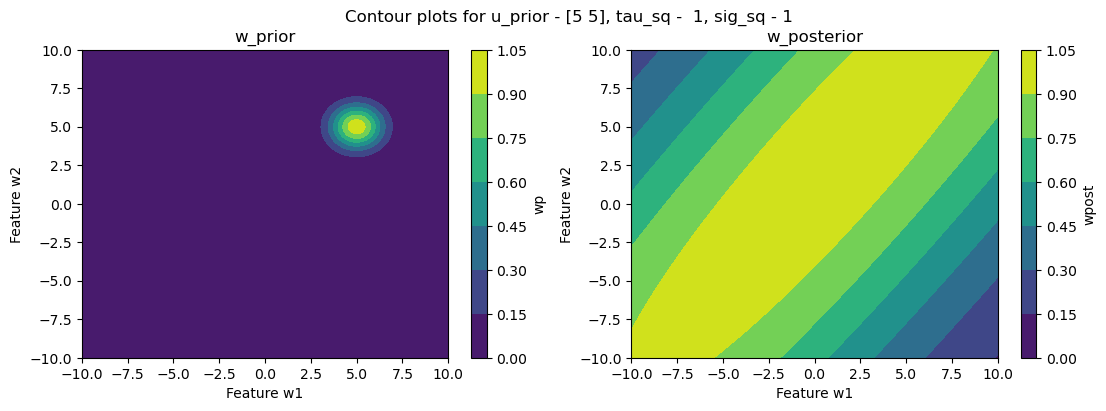

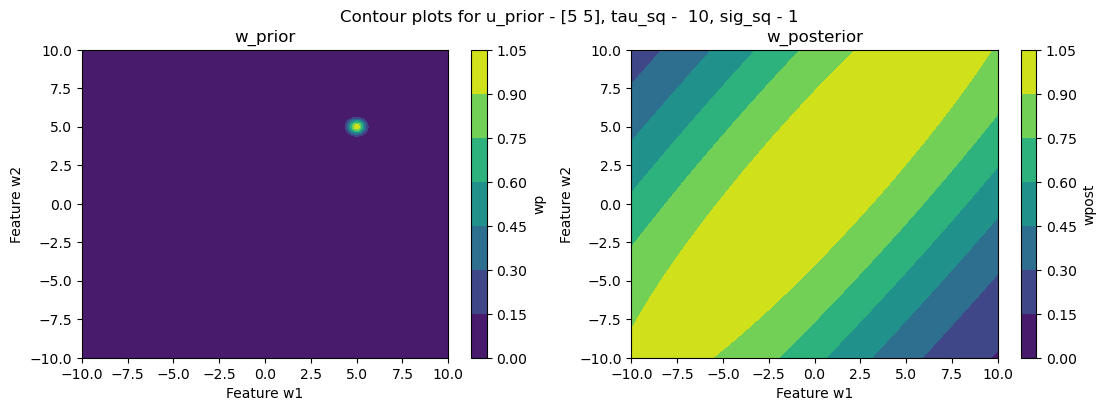

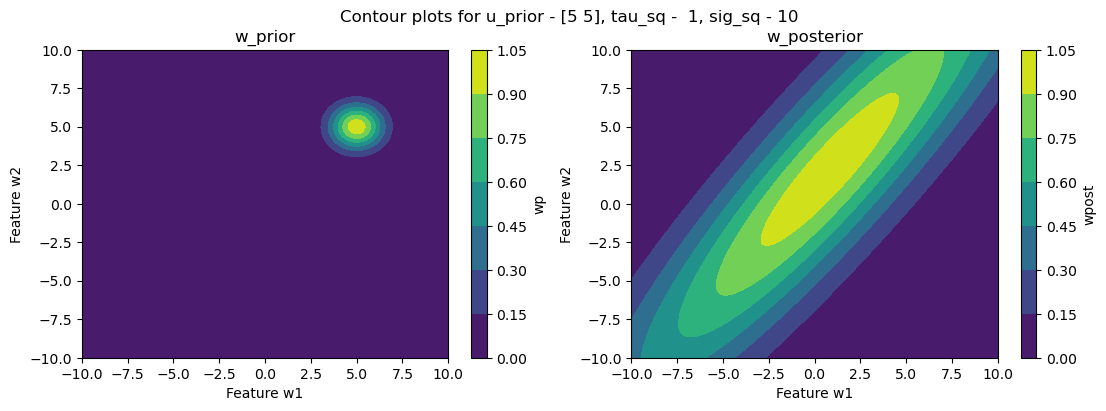

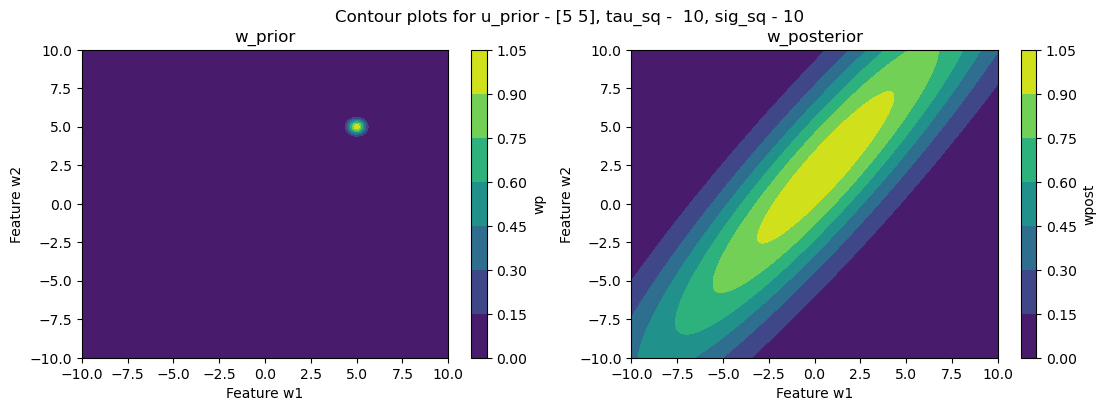

In [23]:
print(" The following contourplots are for the enhanced dataset ")
Xr = np.repeat(X_in, 100, axis=0)
Yr = np.repeat(Y_in, 100, axis=0)

for i in range(8):
    
    u_pr = u_range[i, :].reshape(1,2)
    tau = tau_range[i]
    sig = sig_range[i]
    
    posterior_analysis(u_pr,tau_sq=tau, sig_sq=sig, X=Xr, Y=Yr)

** Cell type : TextWrite **

1) It can be seen that w_prior behaves accordingly with mean u_prior and variance tau_sq.

2) Mean for w_posterior approaches zero as the reg_param = sig_sq/tau_sq increases

3) w_posterior has wider distributions in the presence of more data in the enhanced datset.